# SIRS MODEL
This model is given by equations:
$$\frac{dS}{dt} = -\beta S I+\gamma R, \quad \frac{dI}{dt} = \beta S I-\nu I,\quad \frac{dR}{dt} = \nu I - \gamma R$$
If the Reproductive Number, with value $$\frac{N\beta}{\nu},$$ is greater than 1, then there will be an epidemic.  Note: N is the total population, which is unchanged in this model.

The value of N*beta/nu = 30.599999999999998 , which is greater than 1. There will be an epidemic.


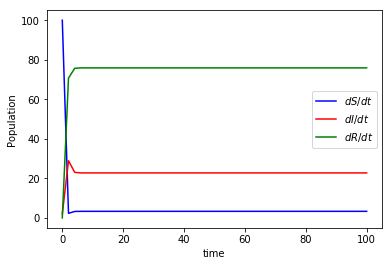

In [11]:
beta=.3
nu=1
gamma=.3

EndTime=100

Sinitial=100
Iinitial=2
Rinitial=0

N=Sinitial + Iinitial + Rinitial

ReproductiveNumber=N*beta/nu

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
if ReproductiveNumber > 1:
    print('The value of N*beta/nu =', ReproductiveNumber, ', which is greater than 1. There will be an epidemic.')
else:
    print('The value of N*beta/nu =', ReproductiveNumber, ', which is less than 1. There will not be an epidemic')
def SIRS(X,t):
    S,I,R = X
    return np.array([-beta*S*I+gamma*R,beta*S*I-nu*I,nu*I-gamma*R])
t=np.linspace(0,EndTime)
z=odeint(SIRS,[Sinitial,Iinitial,Rinitial],t)
plt.plot(t,z[:,0],'b-',label=r'$dS/dt$')
plt.plot(t,z[:,1],'r-',label=r'$dI/dt$')
plt.plot(t,z[:,2],'g-',label=r'$dR/dt$')
plt.ylabel('Population')
plt.xlabel('time')
plt.legend(loc='best')
plt.show() 

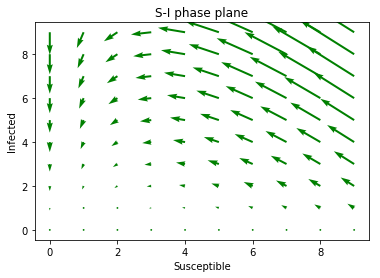

In [12]:
# 2D phase plane S vs. I
x, y, z = np.meshgrid(np.arange(0, 10, 1),
                      np.arange(0, 10, 1),
                      np.arange(0, 10, 2))
u = -beta*x*y+gamma*z
v = beta*x*y-nu*y
w = nu*y-gamma*z
plt.quiver(x[:,:,0],y[:,:,0],u[:,:,0],v[:,:,0],color='g')
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.title('S-I phase plane')
plt.show()